# Taller

Responder las preguntas de analítica acerca de la base de datos de IMDB que se encuentran a lo largo de este documento. Modifique el nombre de este archivo por el número de su documento (123456789.ipynb) y adjúntelo como parte de los entregables del taller.

Nombre: Andrés Julian Caro Restrepo



### Descargar los datos:
- Tabla de películas
- Archivo .shp y archivos auxiliares con la información necesaria para pintar el mapa

Estos archivos quedarán en la carpeta _/content/IMDBAnalyticsData/_ asociada con el sistema operativo del servidor en el que se está ejecutando google colab. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr' -O data
!unzip "/content/data" -d "/content/IMDBAnalyticsData/"


--2023-03-02 23:27:59--  https://docs.google.com/uc?export=download&id=1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr
Resolving docs.google.com (docs.google.com)... 74.125.195.139, 74.125.195.138, 74.125.195.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/43b0a72m0m9ojoo6hi3tg3s5fgju6oj6/1677799650000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=28c6ac86-c9f9-4d35-8700-a06502cdfade [following]
--2023-03-02 23:28:03--  https://doc-14-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/43b0a72m0m9ojoo6hi3tg3s5fgju6oj6/1677799650000/15315348669826032119/*/1osH_xhTCW4Qh7f00VU_UaRK5whEXe8dr?e=download&uuid=28c6ac86-c9f9-4d35-8700-a06502cdfade
Resolving doc-14-6c-docs.googleusercontent.com (doc-14-6c-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:


### Importar las librerías necesarias

La libreia geopandas, que sirve para el procesamiento de archivos con información geográfica (shapefiles) no está instalada por defecto en el ambiente de google colab. Por esta razón, debe instalarla

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### Información básica de la tabla de películas

In [ ]:
df = pd.read_csv('IMDBAnalyticsData/Data/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Pregunta 1**

Utilice histogramas para comparar la distribución de la columna _imdb_score_ relacionada con películas producidas en Francia y Canadá.

Para crear el histograma:

- Ajuste el número de _bins_ a 20
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

Text(0, 0.5, 'yAxis')

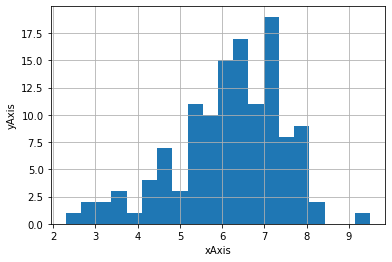

In [ ]:
#Espacio para el código de la pregunta 1 - Canada
indexCountriesCan = df['country'] == "Canada"
df_Can_countries = df[indexCountriesCan]
df_Can_countries

ax = df_Can_countries["imdb_score"].hist(bins = 20)
ax.set_xlabel('xAxis')
ax.set_ylabel('yAxis')

Text(0, 0.5, 'yAxis')

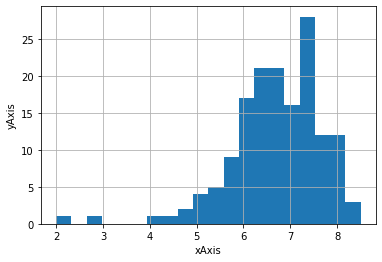

In [ ]:
#Espacio para el código de la pregunta 1 - France
indexCountriesFrance = df['country'] == "France"
df_France_countries = df[indexCountriesFrance]
df_France_countries

ax2 = df_France_countries["imdb_score"].hist(bins = 20)
ax2.set_xlabel('xAxis')
ax2.set_ylabel('yAxis')

**Pregunta 2**

Cree un histograma para mirar la distribución de la columna _imdb_score_ de las películas producidas en blanco y negro.

Para crear el histograma:

- Ajuste el número de _bins_ a 10
- De nombres a las etiquetas de los ejes (xAxis y yAxis)
- Remueva el _grid_

Text(0, 0.5, 'yAxis')

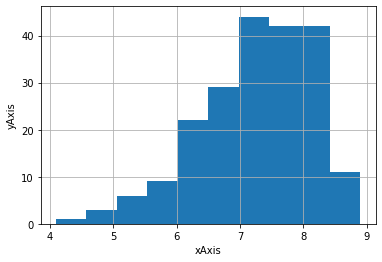

In [ ]:
#Espacio para el código de la pregunta 2
index = df['color'] == " Black and White"
df_color = df[index]
df_color

ax = df_color["imdb_score"].hist(bins = 10)
ax.set_xlabel('xAxis')
ax.set_ylabel('yAxis')

**Pregunta 3**

¿Qué país tiene el mayor promedio de calificación de películas? Utilice figuras de barras para visualizar los resultados.  



country
Afghanistan             7.400000
Argentina               7.500000
Aruba                   4.800000
Australia               6.514545
Bahamas                 4.400000
                          ...   
Turkey                  6.000000
UK                      6.818304
USA                     6.367428
United Arab Emirates    8.200000
West Germany            7.266667
Name: imdb_score, Length: 65, dtype: float64
El país en el que se tiene el mayor promedio es Kyrgyzstan con 8.7 


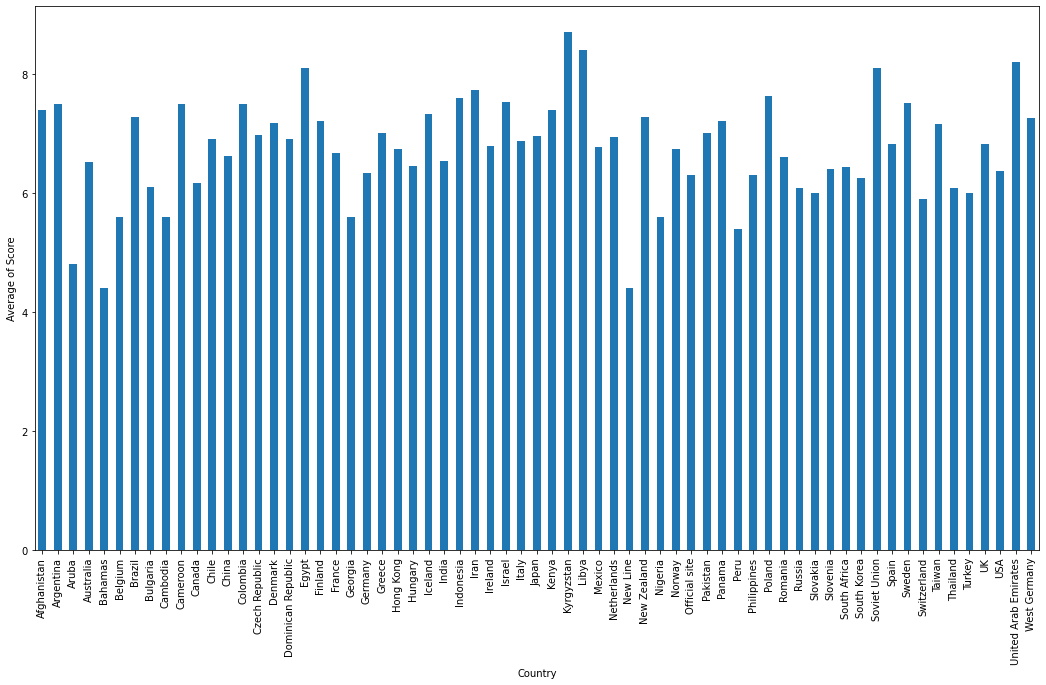

In [ ]:
#Espacio para el código de la pregunta 3
count_per_score = df.groupby('country')['imdb_score'].mean()
print(count_per_score)

promScore = count_per_score.plot.bar(figsize = (18,10))
promScore.set_xlabel('Country')
promScore.set_ylabel('Average of Score')

print(f"El país en el que se tiene el mayor promedio es {count_per_score.idxmax()} con {count_per_score.max()} ")

**Pregunta 4** 

¿Cuántas películas a blanco y negro y cuántas películas a color se tienen en la base de datos?


In [ ]:
#Espacio para el código de la pregunta 4
index = df['color'] == " Black and White"
df_BW = df[index]
count_per_BW = df_BW.groupby('color').size()
print(count_per_BW)

index = df['color'] == "Color"
df_Color = df[index]
count_per_Color = df_Color.groupby('color').size()
print(count_per_Color)

color
 Black and White    209
dtype: int64
color
Color    4815
dtype: int64


**Pregunta 5**

¿Cuál película de Christopher Nolan tiene la mayor calificación (_imdb_score_)? Utilice figuras de barras para visualizar los resultados.

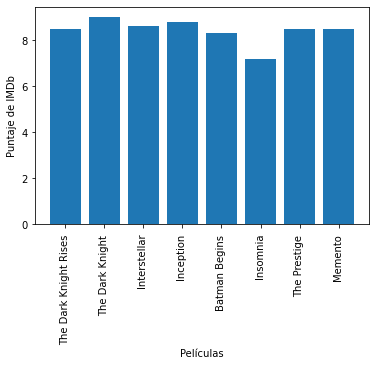

La película de Christopher Nolan con mayor calificación es The Dark Knight  (2008.0) con un puntaje de 9.0.


In [ ]:
#Espacio para el código de la pregunta 5
index = df['director_name'] == "Christopher Nolan"
df_director = df[index]

registro_mayor_imdb_score = df_director.sort_values('imdb_score', ascending=False).head(1)

imdb_scores = df_director['imdb_score']
movie_titles = df_director['movie_title']
fig, ax = plt.subplots()
ax.bar(movie_titles, imdb_scores)
ax.set_xlabel('Películas')
ax.set_ylabel('Puntaje de IMDb')
plt.xticks(rotation=90) # Para rotar las etiquetas del eje X
plt.show()



print(f"La película de Christopher Nolan con mayor calificación es {registro_mayor_imdb_score['movie_title'].values[0]} ({registro_mayor_imdb_score['title_year'].values[0]}) con un puntaje de {registro_mayor_imdb_score['imdb_score'].values[0]}.")




**Pregunta 6**

Utilice un _line chart_ para visualizar cuántas películas se produjeron en USA desde el 2010 hasta el 2015.

Se produjeron 1033 películas en USA desde el 2010 hasta el 2015.



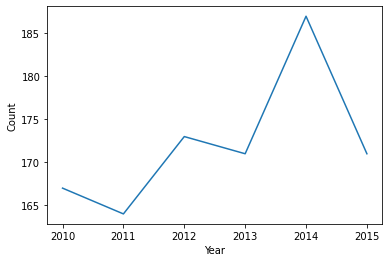

In [32]:
#Espacio para el código de la pregunta 6

df_USA = df.loc[(df['country'] == 'USA') & (df['title_year'] >= 2010) & (df['title_year'] <= 2015)]

df_USA_lineChart = df_USA.groupby("title_year").size()
ax = df_USA_lineChart.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Count')

num_registros = df_USA.shape[0]
print(f"Se produjeron {num_registros} películas en USA desde el 2010 hasta el 2015.\n")

**Pregunta 7**

Grafique en un mapa el _imdb_score_ promedio de las películas producidas en cada país.

In [ ]:
#Espacio para el código de la pregunta 7

#Geolocalización
shpfile = 'IMDBAnalyticsData/Data/Map/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(shpfile)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

#Promedios
count_per_score = df.groupby('country')['imdb_score'].mean().to_frame("Average score")

#Merge
count_per_score_shp = pd.merge(left=geo_df, right=count_per_score, how='left', left_on='country', right_on='country')
count_per_score_shp

#Visualización
fig = px.choropleth_mapbox(count_per_score_shp,
                           geojson=count_per_score_shp.geometry,
                           locations=count_per_score_shp.index,
                           color="Average score",
                           mapbox_style="open-street-map",
                           opacity = 0.5,
                           zoom=1)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Pregunta 8**

¿Qué información de su proyecto podría utilizar para hacer analítica de datos?


**1. Ubicaciones con mayor índice de compra por cantidad de clientes**
Llevando el proyecto a gran escala, podremos contar con muchas tiendas, supermercados, etc haciendo uso de ShoppyFast cómo método para realizar los pagos, lo que nos permitiría contar con datos para sacar información con respecto a cuales son las ubicaciones en las que cada cliente puede "valer" mucho más en base al dinero invertido en las compras.

<br />

**2. Productos top de ventas**
Podríamos tener en cuenta cuales son aquellos productos que más se venden tanto en las distintas tiendas de manera individual, como en todas las tiendas que hacen uso de la plataforma. Este top podría ser muy interesante no solo para las tiendas y saber a qué productos le beneficiaría prestar más atención, sino también a los proveedores/marcas de los productos como tal, debido a que pueden ver cual es la demanda de cada uno de de ellos.

<br />

**3. Ubicación de los productos top de ventas**
Realizar una correlación de datos teniendo en cuenta las variables de la ubicación y la cantidad de ventas por producto.

<br />

**4. Tiempos y promedios de la duración de compras**
Al la plataforma permitir el registro de cada uno de los productos en el carrito de manera simultanea al hacerlo de manera física, podremos contabilizar el tiempo que tarda una compra y con dicho dato sacar información al respecto, como por ejemplo promedios de compra en distintos lugares o dependiendo del producto a comprar...
Debemos tener en cuenta que éste último podría llegar a tener un margen de error alto debido a que es posible que un cliente no registre en la plataforma los productos de manera simultánea a como lo hace de manera física sino que podría llegar a querer dejar éste proceso para cuando ya tenga su carrito físico lleno, lo cual disminuiría el tiempo de compra (desde la perspectiva de la plataforma) de manera notable.

<br />

**5. Satisfacción post-venta del cliente**
Podríamos contar con un sistema para calificar los productos teniendo en cuenta factores como la calidad del producto en sí o el ambiente en la tienda de la realización de la compra.

<br />

**6. Correlación satisfacción-venta**
Con los datos de los puntos 2 y 6 anteriormente mencionados podríamos hallar cual es la correlación entre éstos (la satisfacción del cliente y las ventas del producto). Puede ser interesante debido a que se puede dar el caso en el que la correlación no sea directamente proporcional y teniendo en cuenta cuales son los productos que sí cuentan con un alto grado de satisfacción por parte del cliente se puede adquirir conocimiento para tomar decisiones frente a estrategias para darle más visibilidad a cierto producto.

